In [8]:
import pickle
from tqdm import tqdm
from itertools import islice
from itertools import accumulate
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
import pandas as pd
import scipy.stats as stats
from time import sleep
from itertools import islice
import os
from matplotlib.lines import Line2D

In [17]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

# Overview

Testing for preferential attachment calculations using dictionaries instead of igraph networks

This may eventually not be needed, but just in case...

### Step 1: find cpd-patent dictionary

Goal is to find/build a {cpd: [patents]} data structure, holding all patents from a specific month. This can be used as the basis to calculate degree of cpds over time

In [ ]:
fp = "G:\\Shared drives\\SureChemBL_Patents\\CpdPatentIdsDates\\cpd_patent_edges_1976-01.p"
data = pickle.load(file=open(fp, "rb"))
print(type(data))
print(data)

In [ ]:

for edge in tqdm(data):
    if edge[0] not in cpd_patents:
        cpd_patents[edge[0]] = [edge[1]]
    else:
        cpd_patents[edge[0]].append(edge[1])
        
print(cpd_patents)

In [5]:
print(len(cpd_patents))

37246


In [ ]:
cpd_degrees = {}

for cpd, patents in tqdm(cpd_patents.items()):
    cpd_degrees[cpd] = [len(patents)]
    
print(cpd_degrees)

### Step 2: Extend to a full year

Find degrees over a full year

In [13]:
cpd_degrees = {}
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

for i in tqdm(range(len(months))):
    fp = "G:\\Shared drives\\SureChemBL_Patents\\CpdPatentIdsDates\\cpd_patent_edges_1980-" + months[i] + ".p"
    data = pickle.load(file=open(fp, "rb"))
    
    #Build cpd/patent ids for an individual month
    cpd_patents = {}
    for edge in data:
        if edge[0] not in cpd_patents:
            cpd_patents[edge[0]] = [edge[1]]
        else:
            cpd_patents[edge[0]].append(edge[1])
            
    #Add degrees to full degree list
    
    #Starting with compounds found in a specific month
    for cpd, patents in cpd_patents.items():
        if cpd not in cpd_degrees:
            #Add 0s for months where a compound doesn't appear
            cpd_degrees[cpd] = [0]*i + [len(patents)]
        else:
            #Otherwise add length of degree list
            cpd_degrees[cpd].append(len(patents))
            
    #Add 0s for compounds not found in a specific month
    for cpd in [c for c in cpd_degrees.keys() if c not in cpd_patents.keys()]:
        cpd_degrees[cpd].append(0)
        
print(list(islice(cpd_degrees.items(),100)))

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:26<00:00,  2.23s/it]

[('SCHEMBL11310284', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL7622', [7, 2, 0, 4, 2, 3, 0, 3, 8, 6, 1, 5]), ('SCHEMBL11085183', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL165217', [4, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1]), ('SCHEMBL70835', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL17819', [5, 5, 7, 6, 4, 12, 3, 8, 9, 11, 9, 11]), ('SCHEMBL1967', [43, 36, 46, 52, 44, 45, 40, 50, 55, 51, 47, 55]), ('SCHEMBL78119', [1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0]), ('SCHEMBL11252681', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL545308', [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]), ('SCHEMBL15516', [81, 67, 57, 84, 94, 57, 69, 68, 98, 80, 82, 84]), ('SCHEMBL11411231', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL762', [96, 70, 60, 97, 68, 98, 73, 82, 95, 110, 94, 98]), ('SCHEMBL11427360', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL17612', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL11080172', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL325141', [1, 0, 0, 1, 1, 1, 0, 0, 0, 1

In [12]:
#Testing if all months are accounted for (no message = success)
for degrees in tqdm(cpd_degrees.values()):
    if len(degrees) != 12:
        print(degrees)

100%|█████████████████████████████████████████████████████████████████████| 219007/219007 [00:00<00:00, 2204494.36it/s]


In [15]:
#Find cumulative sum of patents
for key, value in tqdm(cpd_degrees.items()):
    cum_value = list(accumulate(value))
    cpd_degrees[key] = cum_value
    
print(list(islice(cpd_degrees.items(),100)))

100%|██████████████████████████████████████████████████████████████████████| 216978/216978 [00:00<00:00, 835922.83it/s]

[('SCHEMBL11310284', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL7622', [7, 9, 9, 13, 15, 18, 18, 21, 29, 35, 36, 41]), ('SCHEMBL11085183', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL165217', [4, 4, 5, 6, 6, 8, 9, 9, 9, 9, 9, 10]), ('SCHEMBL70835', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL17819', [5, 10, 17, 23, 27, 39, 42, 50, 59, 70, 79, 90]), ('SCHEMBL1967', [43, 79, 125, 177, 221, 266, 306, 356, 411, 462, 509, 564]), ('SCHEMBL78119', [1, 1, 2, 3, 4, 4, 6, 7, 9, 10, 10, 10]), ('SCHEMBL11252681', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL545308', [1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 4, 4]), ('SCHEMBL15516', [81, 148, 205, 289, 383, 440, 509, 577, 675, 755, 837, 921]), ('SCHEMBL11411231', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL762', [96, 166, 226, 323, 391, 489, 562, 644, 739, 849, 943, 1041]), ('SCHEMBL11427360', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL17612', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL11080172', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Step 3 (final!): Extend to a range of years

Build preferential attachment over a range of years

In [3]:
def build_month_list(start, end):
    """ Builds a list of all months in a given range

    Args:
        start (int): year describing the start of the data
        end (int): year describing the end of the data (inclusive)

    Returns:
        list: list of all update months in format "YYYY-MM"
    """
    updates = []
    for year in range(start, end + 1):  # all years through the given end
        for month in range(1, 13):  #include 12 months
            if month < 10:
                updates.append(str(year) + "-0" + str(month))
            else:
                updates.append(str(year) + "-" + str(month))

    return updates

In [4]:
def build_cpd_degrees(start, stop):
    print("----- Building Cpd-Degree for Individual Months -----")
    sleep(0.2)

    updates = build_month_list(start, stop)
    cpd_degrees = {}

    for i in tqdm(range(len(updates))):
        fp = "G:\\Shared drives\\SureChemBL_Patents\\CpdPatentIdsDates\\cpd_patent_edges_" + updates[i] + ".p"
        data = pickle.load(file=open(fp, "rb"))

        #Build cpd/patent ids for an individual month
        cpd_patents = {}
        for edge in data:
            if edge[0] not in cpd_patents:
                cpd_patents[edge[0]] = [edge[1]]
            else:
                cpd_patents[edge[0]].append(edge[1])

        #Add degrees to full degree list

        #Starting with compounds found in a specific month
        for cpd, patents in cpd_patents.items():
            if cpd not in cpd_degrees:
                #Add 0s for months where a compound doesn't appear
                cpd_degrees[cpd] = [0]*i + [len(patents)]
            else:
                #Otherwise add length of degree list
                cpd_degrees[cpd].append(len(patents))

        #Add 0s for compounds not found in a specific month
        for cpd in [c for c in cpd_degrees.keys() if c not in cpd_patents.keys()]:
            cpd_degrees[cpd].append(0)
            
    #Find cumulative sum of patents
    print("----- Calculating Cumulative Degree Sums -----")
    sleep(0.2)
    for key, value in tqdm(cpd_degrees.items()):
        cum_value = list(accumulate(value))
        cpd_degrees[key] = cum_value

    return cpd_degrees

In [5]:
def calculate_pref_attachment(cpd_degrees):
    print("----- Calculating Attachment Index -----")
    sleep(0.2)
    #Calcualate preferential attachment
    pref_attach_dict = {}

    for key, value in tqdm(cpd_degrees.items()):
        c = 0
        attachments = []
        while c < len(value) - 1:
            attachments.append(value[c + 1] - value[c])
            c += 1
        pref_attach_dict[key] = np.mean(attachments)

    return pref_attach_dict

In [44]:
pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

for pair in pairs:
    start = pair[0]
    stop = pair[1]
    print("----- CALCULATING FOR", start, "-", stop, " -----")
    cpd_degrees = build_cpd_degrees(start, stop)
    pref_attach_dict = calculate_pref_attachment(cpd_degrees)

    #Save both cpd_degrees and preferential attachment calculations
    pickle.dump(cpd_degrees, file=open("Data/Attachment_noNetworks/cpd_degrees_" + str(start) + "_" + str(stop) + ".p", "wb"))
    pickle.dump(pref_attach_dict, file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "wb"))

    print()

----- CALCULATING FOR 1980 - 1984  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:23<00:00,  2.52it/s]


----- Calculating Cumulative Degree Sums -----


100%|██████████████████████████████████████████████████████████████████████| 735597/735597 [00:01<00:00, 454456.97it/s]


----- Calculating Attachment Index -----


100%|███████████████████████████████████████████████████████████████████████| 735597/735597 [00:18<00:00, 38817.60it/s]



----- CALCULATING FOR 1985 - 1989  -----
----- Building Cpd-Degree for Individual Months -----


  0%|                                                                                       | 0/959055 [00:00<?, ?it/s]

----- Calculating Cumulative Degree Sums -----


100%|██████████████████████████████████████████████████████████████████████| 959055/959055 [00:02<00:00, 427460.85it/s]


----- Calculating Attachment Index -----


100%|███████████████████████████████████████████████████████████████████████| 959055/959055 [00:25<00:00, 38279.26it/s]



----- CALCULATING FOR 1990 - 1994  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:44<00:00,  4.74s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 1273645/1273645 [00:02<00:00, 435825.03it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 1273645/1273645 [00:33<00:00, 37656.98it/s]



----- CALCULATING FOR 1995 - 1999  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [06:45<00:00,  6.76s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 1664272/1664272 [00:03<00:00, 435452.02it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 1664272/1664272 [00:46<00:00, 36124.72it/s]



----- CALCULATING FOR 2000 - 2004  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [02:16<00:00,  2.27s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 2750039/2750039 [00:06<00:00, 418787.00it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 2750039/2750039 [01:15<00:00, 36373.76it/s]



----- CALCULATING FOR 2005 - 2009  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [24:07<00:00, 24.12s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 5721145/5721145 [00:13<00:00, 439355.52it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 5721145/5721145 [02:30<00:00, 37974.24it/s]



----- CALCULATING FOR 2010 - 2014  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [31:14<00:00, 31.23s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 7340754/7340754 [00:18<00:00, 407631.28it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 7340754/7340754 [03:16<00:00, 37270.30it/s]



----- CALCULATING FOR 2015 - 2019  -----
----- Building Cpd-Degree for Individual Months -----


  0%|                                                                                      | 0/7750295 [00:00<?, ?it/s]

----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 7750295/7750295 [00:18<00:00, 429041.93it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 7750295/7750295 [03:20<00:00, 38647.74it/s]


In [13]:
def find_best_fit_scatter(start, stop, colors, ax):
    #Read in pickled files - from Cronin relative file path
    full_id_degrees = pickle.load(file=open("Data/Attachment_noNetworks/cpd_degrees_" + str(start) + "_" + str(stop) + ".p", "rb"))
    pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    #Read in pickled files - from cronin file path
    # full_id_degrees = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/full_id_degrees_1980_1989.p", "rb"))
    # pref_attach_dict = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/pref_attach_dict_1980_1989.p", "rb"))

    #Create two list of initial degrees
    initial_degrees = []
    for key, value in full_id_degrees.items():
        initial_degrees.append(value[0])

    #Fit line of best fit
    m,b = np.polyfit(initial_degrees, list(pref_attach_dict.values()), 1)
    ax.plot(np.arange(0,max(initial_degrees),1), m*np.arange(0,max(initial_degrees),1) + b,
        label= "slope=" + str(round(m,3)),
        color=colors[str(start)], linewidth=3)

    #Plot all cpd points
    ax.scatter(initial_degrees, pref_attach_dict.values(), color=colors[str(start)], alpha=0.2)
    
    #Linear fit - comment out for full analysis
    x = np.arange(0,max(initial_degrees),1)
    ax.plot(x, x, "--", alpha=0.5, color="k", linewidth=3)

    ax.legend(prop={"size":14}, loc="upper left")
    
    del (full_id_degrees)
    del (pref_attach_dict)
    del (initial_degrees)


 62%|██████▎   | 5/8 [02:24<01:26, 28.98s/it]


KeyboardInterrupt: 

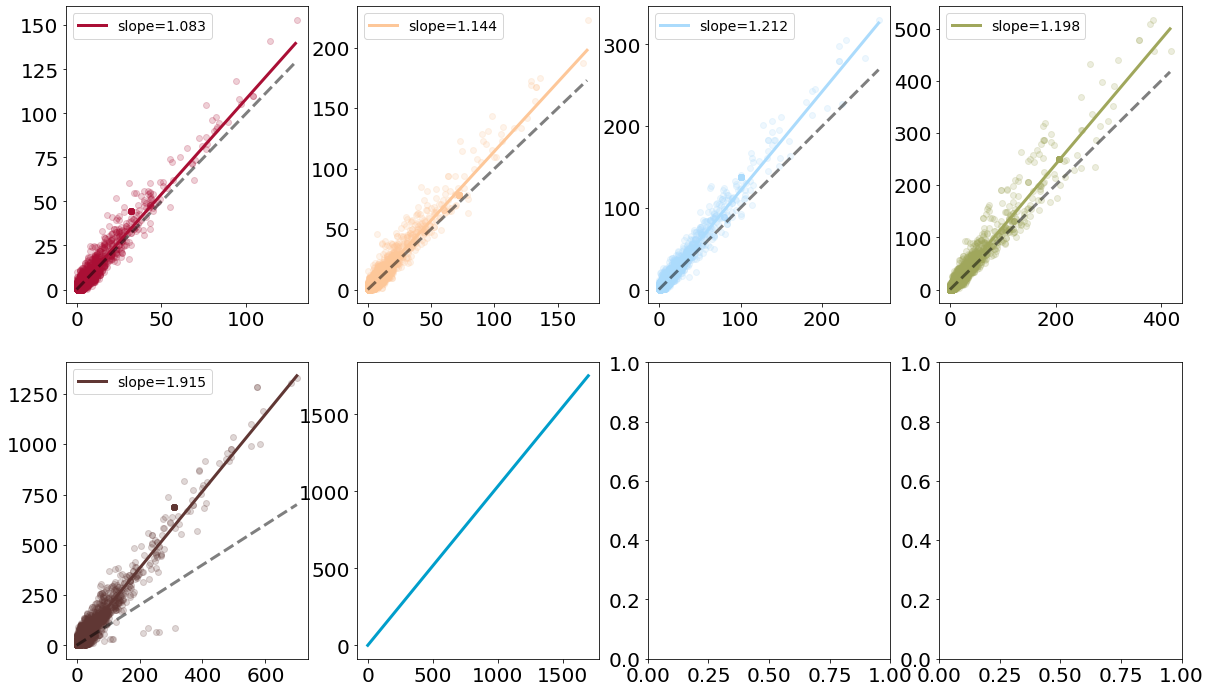

In [31]:
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(20,12))
axes = [fig.add_subplot(241), fig.add_subplot(242), fig.add_subplot(243),
    fig.add_subplot(244), fig.add_subplot(245), fig.add_subplot(246),
    fig.add_subplot(247), fig.add_subplot(248)]

pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

for i in tqdm(range(len(pairs))):
    find_best_fit_scatter(pairs[i][0], pairs[i][1], colors, axes[i])

custom_lines = [Line2D([0], [0], color='k', alpha=0.5, lw=4),
                Line2D([0], [0], color=colors["1980"], lw=4),
                Line2D([0], [0], color=colors["1985"], lw=4),
                Line2D([0], [0], color=colors["1990"], lw=4),
                Line2D([0], [0], color=colors["1995"], lw=4),
                Line2D([0], [0], color=colors["2000"], lw=4),
                Line2D([0], [0], color=colors["2005"], lw=4),
                Line2D([0], [0], color=colors["2010"], lw=4),
                Line2D([0], [0], color=colors["2015"], lw=4)
                ]

# Taken from https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
# plt.subplots_adjust(left=0.125, bottom=0.9, right=0.1, top=0.9, wspace=0.2, hspace=0.2)

plt.legend(custom_lines, ["Linear"] + pairs, bbox_to_anchor=[2,2.24], prop={"size":20})
fig.text(0.5, 0.07, "Initial Degree", ha="center", size=24)
fig.text(0.07, 0.5, "Average Attachment Index", va="center", rotation="vertical", size=24)

## Preferential Attachment Stats & Distributions

Calculate statistics over attachment indicies & distributions

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.94s/it]


Text(0, 0.5, 'Attachment Index')

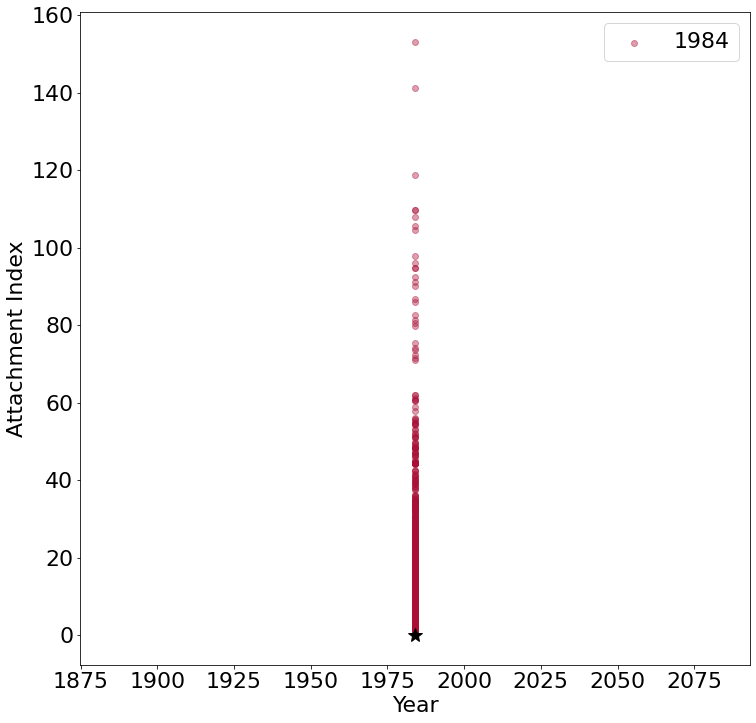

In [3]:
#Track preferential attachments over time
pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

avg_attachment = []
std_attachment = []
max_attachment = []
year = []

#Plot of all attachment values (by themselves, no degree attached)
plt.figure(figsize=(12,12))

for pair in tqdm(pairs): #Should be tqdm(pairs)
    start = pair[0]
    stop = pair[1]
    year.append(stop)
    pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    values = list(pref_attach_dict.values())
    avg_attachment.append(np.mean(values))
    std_attachment.append(np.std(values))
    max_attachment.append(max(values))
    
    plt.scatter(x=[stop]*len(values), y=values, alpha=0.4, color=colors[str(start)], label=str(stop))
    plt.plot(stop, np.mean(values), marker='*', markersize=15, color='k')
    
plt.legend()
plt.xlabel("Year")
plt.ylabel("Attachment Index")

    

In [7]:
#Testing for fast-moving compound analysis
print(list(islice(pref_attach_dict.items(), 10)))

[('SCHEMBL11310284', 0.01694915254237288), ('SCHEMBL7622', 4.711864406779661), ('SCHEMBL11085183', 0.03389830508474576), ('SCHEMBL165217', 0.9491525423728814), ('SCHEMBL70835', 0.01694915254237288), ('SCHEMBL17819', 8.440677966101696), ('SCHEMBL1967', 55.49152542372882), ('SCHEMBL78119', 0.8305084745762712), ('SCHEMBL11252681', 0.03389830508474576), ('SCHEMBL545308', 0.3559322033898305)]


Text(0, 0.5, 'Attachment Index')

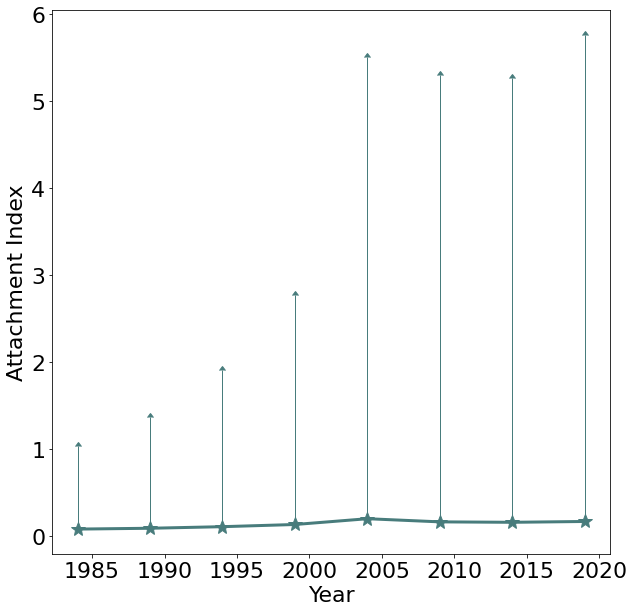

In [69]:
#Error bar plot with average alone - using values calculated in cell above

plt.figure(figsize=(10,10))

plt.errorbar(year, avg_attachment, yerr=std_attachment, marker='*', linewidth=3, elinewidth=1, 
             lolims=True, color="#487c7c", markersize=15)
#plt.scatter(year, max_attachment)

#plt.yscale("log")

plt.xlabel("Year")
plt.ylabel("Attachment Index")

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:36<00:00,  4.58s/it]


Text(0.5, 0, 'Count')

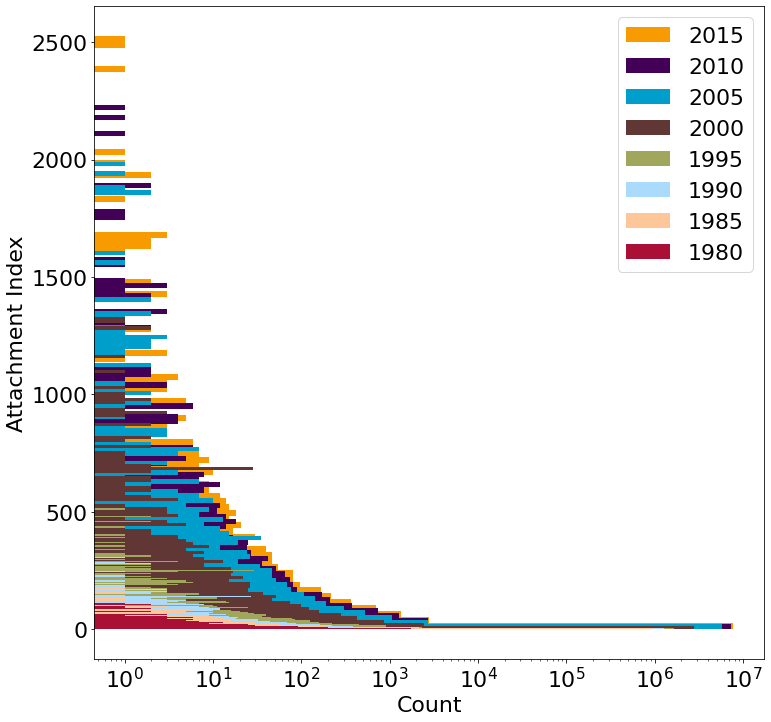

In [98]:
#Attachment index distributions
plt.figure(figsize=(12,12))

for pair in tqdm(reversed(pairs), total=len(pairs)):
    start = pair[0]
    stop = pair[1]
    pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    plt.hist(pref_attach_dict.values(), bins=100, color=colors[str(start)], label=start, orientation="horizontal")
    
plt.legend()
plt.xscale("log")
plt.ylabel("Attachment Index")
plt.xlabel("Count")

## Find most connected compounds

Find those compounds which are X-standard deviations away from average, or those which are in the 99.99th percentile or higher

In [43]:
pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

for pair in tqdm(pairs): #Should be tqdm(pairs)
    start = pair[0]
    stop = pair[1]
    year.append(stop)
    pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    values = list(pref_attach_dict.values())
    
    values = np.array(values)
    avg = np.mean(values)
    std = np.std(values)

    #Calculate threshold/percentile values
    x = 20 #Twenty std deviaations above average
    p = 99.99 #99.99th percentile
    threshold = avg + x*std
    ptile = np.percentile(values, p)

#     #Find how many compounds satisfy both values
#     print("Compounds above", x, "std deviations:", (values >= threshold).sum())
#     print("Compounds above", p, "percentile", (values >= ptile).sum())

    #Find ids associated with values above threshold/percentile values
    threshold_ids = []
    ptile_ids = []
    for key, value in pref_attach_dict.items():
        if value >= threshold:
            threshold_ids.append(key)
        if value >= ptile:
            ptile_ids.append(key)

    #Save all ids (separately) as .txt files
    with open("Data/Cpd_Data/ids_above20stdevs" + str(start) + "_" + str(stop) + ".txt", "w") as f:
        f.write('\n'.join(threshold_ids))

    with open("Data/Cpd_Data/ids_above99_99percentile" + str(start) + "_" + str(stop) + ".txt", "w") as f:
        f.write('\n'.join(ptile_ids))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:35<00:00,  4.47s/it]


Use standard deviations as metric - find those which are 20 standard deviations above average and in the 99.99th percentile. Save SureChemBL IDs, come back to which data is useful (probably in a separte notebook)

## Track individual compounds

Find growing preferential attachment (and degree) of individual compounds over time

Note: this will eventually include network stats, but this is a first step

In [3]:
#Test where inchi/id relationship is

data = pickle.load(file=open("G:\\Shared drives\\SureChemBL_Patents\\Cpd_Data\\SureChemBL_allCpds.p", "rb"))
print(data.head())

  SureChEMBL_ID                                             SMILES  \
0      SCHEMBL4                   C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O   
1      SCHEMBL9  O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...   
2     SCHEMBL10  OC(=O)C=CC(O)=O.CCOC(=O)[C@H](CCC1=CC=CC=C1)N[...   
3     SCHEMBL11  CC\C=C\C1=NC(Cl)=C(C=O)N1CC1=CC=C(C=C1)C1=C(C=...   
4     SCHEMBL12  CC=CCC1=NC(Cl)=C(C=O)N1CC1=CC=C(C=C1)C1=C(C=CC...   

                                               InChI  \
0  InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...   
1  InChI=1S/C20H28N2O5.C4H4O4/c1-3-27-20(26)16(12...   
2  InChI=1S/C20H28N2O5.C4H4O4/c1-3-27-20(26)16(12...   
3  InChI=1S/C22H19ClN6O/c1-2-3-8-20-24-21(23)19(1...   
4  InChI=1S/C22H19ClN6O/c1-2-3-8-20-24-21(23)19(1...   

                      InChIKey  
0  FAKRSMQSSFJEIM-RQJHMYQMSA-N  
1  OYFJQPXVCSSHAI-QFPUQLAESA-N  
2  OYFJQPXVCSSHAI-BDURURIASA-N  
3  VEVNVDSWFRHHHC-FPYGCLRLSA-N  
4  RKCLSSXCTPLPRF-NSCUHMNNSA-N  


In [13]:
#Inchikey testing
lactic_acid = "KRKNYBCHXYNGOX-UHFFFAOYSA-N"

print(data[data["InChIKey"] == lactic_acid])

          SureChEMBL_ID                                      SMILES  \
6453500  SCHEMBL7206089  [H+].[H+].OC(=O)CC(O)(CC([O-])=O)C([O-])=O   

                                                     InChI  \
6453500  InChI=1S/C6H8O7/c7-3(8)1-6(13,5(11)12)2-4(9)10...   

                            InChIKey  
6453500  KRKNYBCHXYNGOX-UHFFFAOYSA-N  


In [4]:
def find_id(inchi):
    """ Finds the SureChemBL id of a given inchi string
    """
    try:
        return data[data["InChI"] == inchi]["SureChEMBL_ID"].values[0]
    except:
        print(inchi, "not found")
        return None

In [5]:
def track_attachment(id, name):
    #Track preferential attachments over time
    pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

    print("----- Searching for " + name + ", " + id + " -----")
    sleep(0.2)
    cpd_values = []

    for pair in tqdm(pairs):
        start = pair[0]
        stop = pair[1]
        pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))

        if id in pref_attach_dict:
            cpd_values.append(pref_attach_dict[id])
        else:
            cpd_values.append(0)

    return cpd_values

In [21]:
psychedelic_cpds = [
    ("InChI=1S/C12H17N2O4P/c1-14(2)7-6-9-8-13-10-4-3-5-11(12(9)10)18-19(15,16)17/h3-5,8,13H,6-7H2,1-2H3,(H2,15,16,17)",
    "Psilocybine", "#a0a75c"),
    ("InChI=1S/C20H25N3O/c1-4-23(5-2)20(24)14-9-16-15-7-6-8-17-19(15)13(11-21-17)10-18(16)22(3)12-14/h6-9,11,14,18,21H,4-5,10,12H2,1-3H3/t14-,18-/m1/s1", 
     "LSD", "#aa0f35"),
    ("InChI=1S/C11H15NO2/c1-8(12-2)5-9-3-4-10-11(6-9)14-7-13-10/h3-4,6,8,12H,5,7H2,1-2H3",
    "Ecstasy", "#fdc799"),
    ("InChI=1S/C13H16ClNO/c1-15-13(9-5-4-8-12(13)16)10-6-2-3-7-11(10)14/h2-3,6-7,15H,4-5,8-9H2,1H3",
     "Ketamine", "#abdbfc"),
    ("InChI=1S/C12H16N2/c1-14(2)8-7-10-9-13-12-6-4-3-5-11(10)12/h3-6,9,13H,7-8H2,1-2H3",
    "DMT", "#603734")
]

In [22]:
industrial_cpds = [
    ("InChI=1S/O.Zn", "Zinc oxide", "#a0a75c"),
    ("InChI=1S/2Al.3O/q2*+3;3*-2", "Aluminum oxide", "#aa0f35"),
    ("InChI=1S/2O.Ti", "Titanium dioxide", "#fdc799"),
    ("InChI=1S/O2Si/c1-3-2", "Silicon dioxide", "#abdbfc"),
    ("InChI=1S/Pb.S", "Lead sulfide", "#603734"),
    ("InChI=1S/Cu.O", "Cupric oxide", "#313a61")
]

In [34]:
sars_cpds = [
    ("InChI=1S/C26H28N2O3/c1-18(22-8-4-6-20-5-2-3-7-23(20)22)28-13-11-21(12-14-28)26(29)27-16-19-9-10-24-25(15-19)31-17-30-24/h2-10,15,18,21H,11-14,16-17H2,1H3,(H,27,29)/t18-/m1/s1",
    "GRL-0667", "#a0a75c"),
    ("InChI=1S/C20H20N2O/c1-13-10-11-16(21)12-19(13)20(23)22-14(2)17-9-5-7-15-6-3-4-8-18(15)17/h3-12,14H,21H2,1-2H3,(H,22,23)/t14-/m1/s1",
    "GRL-0617", "#aa0f35"),
    ("InChI=1S/C17H20O6/c1-9(5-7-13(18)19)4-6-11-15(20)14-12(8-23-17(14)21)10(2)16(11)22-3/h4,20H,5-8H2,1-3H3,(H,18,19)/b9-4+",
    "Mycophenolic acid", "#fdc799"),
    ("InChI=1S/C36H53N7O6/c1-5-10-25(29(44)34(48)39-23-15-16-23)40-33(47)28-24-14-9-13-22(24)20-43(28)35(49)30(36(2,3)4)42-32(46)27(21-11-7-6-8-12-21)41-31(45)26-19-37-17-18-38-26/h17-19,21-25,27-28,30H,5-16,20H2,1-4H3,(H,39,48)(H,40,47)(H,41,45)(H,42,46)/t22-,24-,25-,27-,28-,30+/m0/s1",
    "Telaprevir", "#abdbfc"),
    ("InChI=1S/C27H45N5O5/c1-25(2,3)20(30-24(37)31-26(4,5)6)23(36)32-13-15-17(27(15,7)8)18(32)22(35)29-16(19(33)21(28)34)12-14-10-9-11-14/h14-18,20H,9-13H2,1-8H3,(H2,28,34)(H,29,35)(H2,30,31,37)/t15-,16?,17-,18-,20+/m0/s1",
    "Boceprevir", "#603734"),
    ("InChI=1S/C38H50N6O9S/c1-6-22-19-38(22,35(47)43-54(49,50)25-13-14-25)42-32(45)29-18-24-20-44(29)34(46)31(37(2,3)4)41-36(48)53-30-16-21(30)10-8-7-9-11-27-33(52-24)40-28-17-23(51-5)12-15-26(28)39-27/h6,12,15,17,21-22,24-25,29-31H,1,7-11,13-14,16,18-20H2,2-5H3,(H,41,48)(H,42,45)(H,43,47)/t21-,22-,24-,29+,30-,31-,38-/m1/s1",
    "Grazoprevir", "#313a61")
]

In [6]:
#Green solvents (Pachero-Fernandez 2019)
green_solvents = [
    ("InChI=1S/C16H26O2/c1-15(2,3)12-16(4,5)13-6-8-14(9-7-13)18-11-10-17/h6-9,17H,10-12H2,1-5H3",
    "Triton X-100", "#a0a75c"),
    ("InChI=1S/C18H30O3/c1-17(2,3)14-18(4,5)15-6-8-16(9-7-15)21-13-12-20-11-10-19/h6-9,19H,10-14H2,1-5H3",
    "Triton X-114", "#aa0f35"),
    ("InChI=1S/C12H26O4S.Na/c1-2-3-4-5-6-7-8-9-10-11-12-16-17(13,14)15;/h2-12H2,1H3,(H,13,14,15);/q;+1/p-1",
    "SDS", "#fdc799"),
    ("InChI=1S/C19H42N.BrH/c1-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20(2,3)4;/h5-19H2,1-4H3;1H/q+1;/p-1",
    "CTAB", "#abdbfc"),
    ("InChI=1S/C6H14O/c1-2-3-4-5-6-7/h7H,2-6H2,1H3",
    "1-hexanol", "#603734"),
    ("InChI=1S/C8H18O/c1-2-3-4-5-6-7-8-9/h9H,2-8H2,1H3", 
    "1-octanol", "#313a61"),
    ("InChI=1S/C10H22O/c1-2-3-4-5-6-7-8-9-10-11/h11H,2-10H2,1H3",
    "1-decanol", "#aaaaaa"),
    ("InChI=1S/C10H20O2/c1-2-3-4-5-6-7-8-9-10(11)12/h2-9H2,1H3,(H,11,12)",
    "Decanoic acid", "#e78d32")
]

In [6]:
#Green ionic lipids (Pachero-Fernandex, 2019) - only one (Cholinium chloride) is found
green_ionic_lipids = [
    ("InChI=1S/C5H14NO.ClH/c1-6(2,3)4-5-7;/h7H,4-5H2,1-3H3;1H/q+1;/p-1",
    "Cholinium Chloride", "#a0a75c"),
    ("InChI=1S/C6H15S.C2F6NO4S2/c1-4-7(5-2)6-3;3-1(4,5)14(10,11)9-15(12,13)2(6,7)8/h4-6H2,1-3H3;/q+1;-1",
    "Triethylsulfonium Bis(trifluoromethanesulfonyl)imide", "#aa0f35"),
    ("InChI=1S/F6P/c1-7(2,3,4,5)6/q-1",
    "Hexafluorophosphate", "#fdc799"),
    ("InChI=1S/4ClH.Mn/h4*1H;/q;;;;+2/p-4",
    "Tetrachloromanganate (II)", "#abdbfc"),
    ("InChI=1S/C2H4O3/c3-1-2(4)5/h3H,1H2,(H,4,5)/p-1",
    "Glycolate", "#603734"),
    ("InChI=1S/ClH/h1H/p-1",
    "Chloride", "#313a61")
]

In [10]:
green_eutectic_solvents = [
    ("InChI=1S/C5H14NO.ClH/c1-6(2,3)4-5-7;/h7H,4-5H2,1-3H3;1H/q+1;/p-1",
    "Cholinium Chloride", "#a0a75c"),
    ("InChI=1S/CH4N2O/c2-1(3)4/h(H4,2,3,4)",
    "Urea", "#aa0f35"),
    ("InChI=1S/C2H6O2/c3-1-2-4/h3-4H,1-2H2",
    "Glycol", "#fdc799"),
    ("InChI=1S/C6H5ClO/c7-5-1-3-6(8)4-2-5/h1-4,8H",
    "4-Chlorophenol", "#abdbfc"),
    ("InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1",
    "D-Glucose", "#603734"),
    ("InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)",
    "Lactic acid", "#313a61"),
    ("InChI=1S/C6H8O7/c7-3(8)1-6(13,5(11)12)2-4(9)10/h13H,1-2H2,(H,7,8)(H,9,10)(H,11,12)",
    "Citric acid", "#aaaaaa")
]

In [7]:
#Set up average attachment
pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

avg_attachment = []
std_attachment = []
years = []

for pair in tqdm(pairs):
    start = pair[0]
    stop = pair[1]
    years.append(stop)
    pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    values = list(pref_attach_dict.values())
    avg_attachment.append(np.mean(values))
    std_attachment.append(np.std(values))


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:34<00:00,  4.29s/it]


----- Searching for Cholinium Chloride, SCHEMBL14957 -----


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:27<00:00,  3.46s/it]


InChI=1S/CH4N2O/c2-1(3)4/h(H4,2,3,4) not found
InChI=1S/C2H6O2/c3-1-2-4/h3-4H,1-2H2 not found
----- Searching for 4-Chlorophenol, SCHEMBL28864 -----


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:27<00:00,  3.44s/it]


InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1 not found
InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6) not found
----- Searching for Citric acid, SCHEMBL7206089 -----


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:27<00:00,  3.41s/it]


Text(0, 0.5, 'Attachment Index')

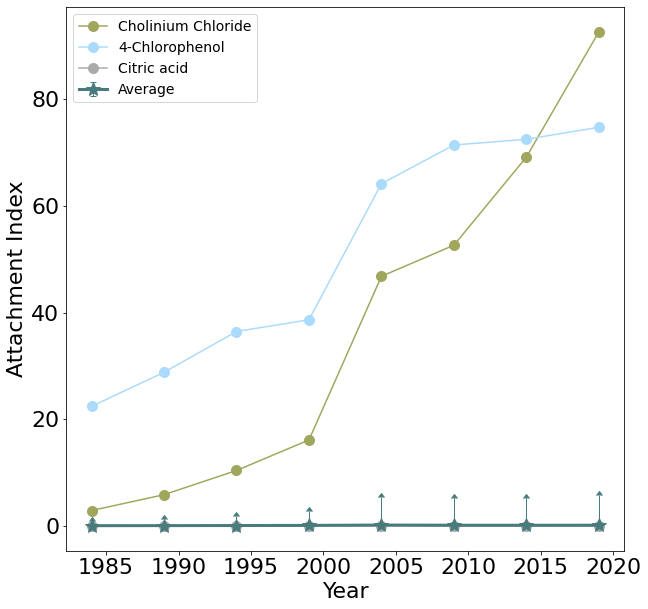

In [11]:
#Plot values relative to average & std deviation
plt.figure(figsize=(10,10))

plt.errorbar(years, avg_attachment, yerr=std_attachment, marker='*', linewidth=3, elinewidth=1, 
                 lolims=True, color="#487c7c", markersize=15, label="Average")

for inchi, name, c in green_eutectic_solvents: #Change the cpd variable with different sets of compounds
    id = find_id(inchi)
    if id:
        cpd_values = track_attachment(id, name)

        plt.plot(years, cpd_values, 'o', linestyle="solid", label=name,color=c, markersize=10)

#plt.yscale("log")

plt.legend(prop={"size":14})
plt.xlabel("Year")
plt.ylabel("Attachment Index")

## Track fast-moving compounds

Find compounds which make a significant (>6 std devs?) across 1 5-year period, and across all time periods

Steps
1. Dictionary of all SureChemBL IDs with attachment values from each time period ({id: [...]})
2. Find avg/std devs/percentiles of jumps across the full time period
3. Find avg/std devs of jumps between each time period
3. Find compounds associated with all significant jumps

In [47]:
pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

for pair in tqdm([(1980,1984)]): #Should be tqdm(pairs)
    start = pair[0]
    stop = pair[1]
    year.append(stop)
    pref_attach_dict = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    print(list(islice(pref_attach_dict.items(), 10)))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]

[('SCHEMBL11310284', 0.01694915254237288), ('SCHEMBL7622', 4.711864406779661), ('SCHEMBL11085183', 0.03389830508474576), ('SCHEMBL165217', 0.9491525423728814), ('SCHEMBL70835', 0.01694915254237288), ('SCHEMBL17819', 8.440677966101696), ('SCHEMBL1967', 55.49152542372882), ('SCHEMBL78119', 0.8305084745762712), ('SCHEMBL11252681', 0.03389830508474576), ('SCHEMBL545308', 0.3559322033898305)]


In [50]:
#Dict testing
d1 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_1980_1984.p", "rb"))
d2 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_1985_1989.p", "rb"))
d3 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_1990_1994.p", "rb"))
d4 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_1995_1999.p", "rb"))
d5 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_2000_2004.p", "rb"))
d6 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_2005_2009.p", "rb"))
d7 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_2010_2014.p", "rb"))
d8 = pickle.load(file=open("Data/Attachment_noNetworks/pref_attach_2015_2019.p", "rb"))

In [51]:
#Code from: https://stackoverflow.com/questions/57253784/python-program-to-combine-two-dictionary-adding-values-for-common-keys
d = {k: [d1.get(k,0), d2.get(k,0), d3.get(k,0), d4.get(k,0), d5.get(k,0), d6.get(k,0), d7.get(k,0), d8.get(k,0)] 
     for k in d1.keys() | d2.keys() | d3.keys() | d4.keys() | d5.keys() | d6.keys() | d7.keys() | d8.keys()}
print(list(islice(d.items(), 100)))

[('SCHEMBL3937048', [0, 0, 0, 0, 0, 0.05084745762711865, 0, 0]), ('SCHEMBL5034970', [0, 0, 0, 0, 0, 0.05084745762711865, 0, 0]), ('SCHEMBL12077395', [0, 0, 0, 0, 0, 0, 0.06779661016949153, 0.03389830508474576]), ('SCHEMBL16902388', [0, 0, 0, 0, 0, 0, 0, 0.03389830508474576]), ('SCHEMBL5711800', [0, 0, 0, 0, 0.05084745762711865, 0.05084745762711865, 0, 0]), ('SCHEMBL17197838', [0, 0, 0, 0, 0, 0, 0, 0.01694915254237288]), ('SCHEMBL18197322', [0, 0, 0, 0, 0, 0, 0, 0.01694915254237288]), ('SCHEMBL10911394', [0, 0.03389830508474576, 0, 0, 0, 0, 0, 0]), ('SCHEMBL3487027', [0, 0, 0, 0, 0, 0.06779661016949153, 0.0, 0]), ('SCHEMBL3262358', [0, 0, 0, 0, 0, 0, 0.01694915254237288, 0]), ('SCHEMBL9951767', [0, 0, 0, 0, 0, 0, 0.0847457627118644, 0.05084745762711865]), ('SCHEMBL17227609', [0, 0, 0, 0, 0, 0, 0, 0.06779661016949153]), ('SCHEMBL19576727', [0, 0, 0, 0, 0, 0, 0, 0.01694915254237288]), ('SCHEMBL15066076', [0, 0, 0, 0, 0, 0, 0.03389830508474576, 0.0847457627118644]), ('SCHEMBL6214587', [0, 

In [55]:
#Save dictionary
pickle.dump(d, file=open("Data/Cpd_Data/attachment_values_allIDs.p", "wb"))

In [4]:
#Open dict 
data = pickle.load(file=open("Data/Cpd_Data/attachment_values_allIDs.p", "rb"))
print(list(islice(data.items(), 10)))

[('SCHEMBL3937048', [0, 0, 0, 0, 0, 0.05084745762711865, 0, 0]), ('SCHEMBL5034970', [0, 0, 0, 0, 0, 0.05084745762711865, 0, 0]), ('SCHEMBL12077395', [0, 0, 0, 0, 0, 0, 0.06779661016949153, 0.03389830508474576]), ('SCHEMBL16902388', [0, 0, 0, 0, 0, 0, 0, 0.03389830508474576]), ('SCHEMBL5711800', [0, 0, 0, 0, 0.05084745762711865, 0.05084745762711865, 0, 0]), ('SCHEMBL17197838', [0, 0, 0, 0, 0, 0, 0, 0.01694915254237288]), ('SCHEMBL18197322', [0, 0, 0, 0, 0, 0, 0, 0.01694915254237288]), ('SCHEMBL10911394', [0, 0.03389830508474576, 0, 0, 0, 0, 0, 0]), ('SCHEMBL3487027', [0, 0, 0, 0, 0, 0.06779661016949153, 0.0, 0]), ('SCHEMBL3262358', [0, 0, 0, 0, 0, 0, 0.01694915254237288, 0])]


In [52]:
#Avg / stdev testing of data
def get_changing_values(data, year1, year2):
    """ Find the average, standard deviation, and all change values from a specific data range"""
    change_values = []
    
    #Link date range with value positions
    d = {1984: 0, 1989: 1, 1994: 2, 1999: 3, 2004: 4, 2009: 5,
        2014: 6, 2019: 7}
    
    for id, vals in data.items():
        if vals[d[year1]] != 0 and vals[d[year2]] != 0: #Analyzing 1984-1989
            change_values.append(vals[d[year2]] - vals[d[year1]])

    avg = np.mean(change_values)
    std = np.std(change_values)
    change_values = np.array(change_values)
    
    return avg, std, change_values

In [42]:
#Find all data above 20 stdevs away from mean (as a first pass)
def stdevs(avg, std, multiplier):
    """ Finds the values +/- stdev*multiplier """
    min_value = avg - multiplier*std
    max_value = avg + multiplier*std

    print("Compounds below", multiplier, "standard deviations:", (change_values <= min_value).sum())
    print("Compounds above", multiplier, "standard deviations:", (change_values >= max_value).sum())
    
    return min_value, max_value

In [55]:
#Find all data above the 99.99th percentile (and below the 0.01st percentile)
def percentiles(change_values, min_percentile, max_percentile):
    """ Finds the percentile values associated with a min and maximum percentile """
    p99 = np.percentile(change_values, max_percentile)
    p01 = np.percentile(change_values, min_percentile)

    print("Compounds below min percentile:", (change_values <= p01).sum())
    print("Compounds in the max percentile:", (change_values >= p99).sum())
    
    return p01, p99

In [57]:
## FINDING ALL CPD IDs ABOVE/BELOW 99.9 AND 0.1 PERCENTILES ###
pairs = [(1984, 1989), (1989, 1994), (1994, 1999), (1999, 2004), (2004, 2009), (2009, 2014), (2014,2019)]

for pair in pairs:
    print("----- Analyzing", pair, "-----")
    sleep(0.25)

    start = pair[0]
    stop = pair[1]
    
    min_p = 0.01
    max_p = 99.99

    avg, std, change_values = get_changing_values(data, start, stop)
    p01, p99 = percentiles(change_values, min_p, max_p)
    max_ids = []
    min_ids = []
    for id, vals in data.items():
        if vals[-1] != 0 and vals[1] != 0: #Analyzing 1984-1989
            if (vals[1] - vals[0]) >= p99:
                max_ids.append(id)
            elif (vals[1] - vals[0]) <= p01:
                min_ids.append(id)

    #Save all ids (separately) as .txt files
    with open("Data/Cpd_Data/ids_change_minPercentile_" + 
              str(min_p) + "_"+ str(max_p) + "_" + str(start) + "_" + str(stop) + ".txt", "w") as f:
        f.write('\n'.join(min_ids))

    with open("Data/Cpd_Data/ids_change_maxPercentile_" + 
              str(min_p) + "_"+ str(max_p) + "_" + str(start) + "_" + str(stop) + ".txt", "w") as f:
        f.write('\n'.join(max_ids))

----- Analyzing (1984, 1989) -----
Compounds below min percentile: 28
Compounds in the max percentile: 27
----- Analyzing (1989, 1994) -----
Compounds below min percentile: 41
Compounds in the max percentile: 61
----- Analyzing (1994, 1999) -----
Compounds below min percentile: 56
Compounds in the max percentile: 62
----- Analyzing (1999, 2004) -----
Compounds below min percentile: 79
Compounds in the max percentile: 79
----- Analyzing (2004, 2009) -----
Compounds below min percentile: 148
Compounds in the max percentile: 148
----- Analyzing (2009, 2014) -----
Compounds below min percentile: 279
Compounds in the max percentile: 279
----- Analyzing (2014, 2019) -----
Compounds below min percentile: 280
Compounds in the max percentile: 280


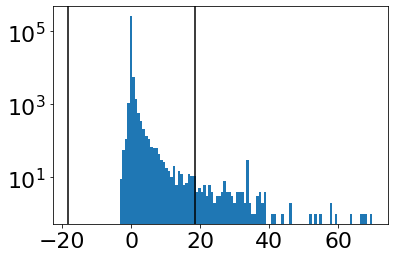

In [28]:
#Visualize distribution
plt.hist(change_values, bins=100)
plt.axvline(avg - 20*std,color='k')
plt.axvline(avg + 20*std, color='k')

plt.yscale("log")

plt.show()

### Save relevant data from fast-moving compounds

Take SureChemBL ids from each .txt file generated above, save the chemical data associated with each compound

In [67]:
data = pickle.load(file=open("G:\\Shared drives\\SureChemBL_Patents\\Cpd_Data\\SureChemBL_allCpds.p", "rb"))
print(data.head())

  SureChEMBL_ID                                             SMILES  \
0      SCHEMBL4                   C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O   
1      SCHEMBL9  O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...   
2     SCHEMBL10  OC(=O)C=CC(O)=O.CCOC(=O)[C@H](CCC1=CC=CC=C1)N[...   
3     SCHEMBL11  CC\C=C\C1=NC(Cl)=C(C=O)N1CC1=CC=C(C=C1)C1=C(C=...   
4     SCHEMBL12  CC=CCC1=NC(Cl)=C(C=O)N1CC1=CC=C(C=C1)C1=C(C=CC...   

                                               InChI  \
0  InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...   
1  InChI=1S/C20H28N2O5.C4H4O4/c1-3-27-20(26)16(12...   
2  InChI=1S/C20H28N2O5.C4H4O4/c1-3-27-20(26)16(12...   
3  InChI=1S/C22H19ClN6O/c1-2-3-8-20-24-21(23)19(1...   
4  InChI=1S/C22H19ClN6O/c1-2-3-8-20-24-21(23)19(1...   

                      InChIKey  
0  FAKRSMQSSFJEIM-RQJHMYQMSA-N  
1  OYFJQPXVCSSHAI-QFPUQLAESA-N  
2  OYFJQPXVCSSHAI-BDURURIASA-N  
3  VEVNVDSWFRHHHC-FPYGCLRLSA-N  
4  RKCLSSXCTPLPRF-NSCUHMNNSA-N  


In [69]:
#Test
with open("Data/Cpd_Data/ids_above99_99percentile1980_1984.txt") as f:
    cpds = [cpd.strip() for cpd in f.readlines()]
    sub_df = data[data["SureChEMBL_ID"].isin(cpds)]
    print(sub_df.head())
    sub_df.to_csv("Data/Cpd_Data/ids_above99_99percentile1980_1984_cpdData.csv")

   SureChEMBL_ID                                  SMILES  \
12     SCHEMBL34                CC1=CC=C(C=C1)S(O)(=O)=O   
24     SCHEMBL63      O=C(OOC(=O)C1=CC=CC=C1)C1=CC=CC=C1   
38    SCHEMBL101  C1=CC=C(C=C1)P(C1=CC=CC=C1)C1=CC=CC=C1   
48    SCHEMBL121                     CC(CN=NCC(C)C#N)C#N   
49    SCHEMBL122                 CC(C)(N=NC(C)(C)C#N)C#N   

                                                InChI  \
12  InChI=1S/C7H8O3S/c1-6-2-4-7(5-3-6)11(8,9)10/h2...   
24  InChI=1S/C14H10O4/c15-13(11-7-3-1-4-8-11)17-18...   
38  InChI=1S/C18H15P/c1-4-10-16(11-5-1)19(17-12-6-...   
48  InChI=1S/C8H12N4/c1-7(3-9)5-11-12-6-8(2)4-10/h...   
49  InChI=1S/C8H12N4/c1-7(2,5-9)11-12-8(3,4)6-10/h...   

                       InChIKey  
12  JOXIMZWYDAKGHI-UHFFFAOYSA-N  
24  OMPJBNCRMGITSC-UHFFFAOYSA-N  
38  RIOQSEWOXXDEQQ-UHFFFAOYSA-N  
48  FLZDRQXGVYVYSL-VAWYXSNFSA-N  
49  OZAIFHULBGXAKX-UHFFFAOYSA-N  


In [71]:
fp = "Data/Cpd_Data/"
for fname in tqdm(os.listdir(fp)):
    if fname.endswith(".txt"):
        with open(fp + fname) as f:
            cpds = [cpd.strip() for cpd in f.readlines()]
            sub_df = data[data["SureChEMBL_ID"].isin(cpds)]

            sub_df.to_csv(fp + fname[:-4] + "cpdData.csv")

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:40<00:00,  1.15it/s]
